<a href="https://colab.research.google.com/github/Cassi686/Cassi686/blob/main/E_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns 

In [22]:
df = pd.read_excel('/content/C├│pia de aprovacao_alunos (1).xlsx')

In [23]:
df.head()

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76


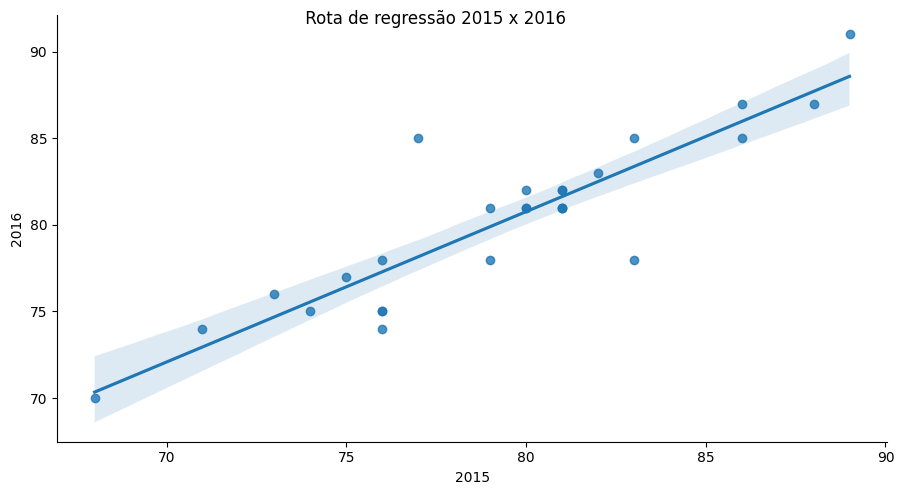

In [33]:
ax= sns.lmplot(x='ano_2015', y='ano_2016', data = df)
ax.fig.set_size_inches(10,5)
ax.fig.suptitle(" Rota de regressão 2015 x 2016")
ax.set_xlabels('2015')
ax.set_ylabels('2016')

In [25]:
df.corr()

<ipython-input-25-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [26]:
import statsmodels.api as sm

In [27]:
y = df.ano_2016
x = sm.add_constant(df.ano_2015)

In [28]:
y.head()

0    85
1    81
2    85
3    82
4    76
Name: ano_2016, dtype: int64

In [29]:
resultado_regressao = sm.OLS(y,x).fit()

In [30]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           3.02e-10
Time:                        18:41:17   Log-Likelihood:                -58.476
No. Observations:                  27   AIC:                             121.0
Df Residuals:                      25   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3143      6.880      1.645      0.1

In [31]:
df['y_previsto'] = resultado_regressao.predict()
df.head()

,UF,ano_2015,ano_2016,y_previsto
0,Rondonia,77,85,78.159571
1,Acre,79,81,79.895812
2,Amazonas,83,85,83.368294
3,Roraima,81,82,81.632053
4,Para,73,76,74.687089


In [32]:
df['resíduo'] = df['y_previsto']-df['ano_2016']
df.head()

,UF,ano_2015,ano_2016,y_previsto,resíduo
0,Rondonia,77,85,78.159571,-6.840429
1,Acre,79,81,79.895812,-1.104188
2,Amazonas,83,85,83.368294,-1.631706
3,Roraima,81,82,81.632053,-0.367947
4,Para,73,76,74.687089,-1.312911
